In [68]:
import pandas as pd
import numpy as nd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

In [69]:
df = pd.read_csv("/kaggle/input/employer-data/Employers_data.csv")
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [70]:
df = df.drop(columns = ["Employee_ID","Name","Job_Title","Location"])
print("Number of Null values\n",df.isnull().sum())
print("\nData types\n",df.dtypes)

Number of Null values
 Age                 0
Gender              0
Department          0
Experience_Years    0
Education_Level     0
Salary              0
dtype: int64

Data types
 Age                  int64
Gender              object
Department          object
Experience_Years     int64
Education_Level     object
Salary               int64
dtype: object


In [71]:
df = pd.get_dummies(df, columns= ["Gender","Department","Education_Level"])

In [72]:
x = df.drop(columns = "Salary")
y = df["Salary"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=13)
model_liner= LinearRegression()
model_liner.fit(x_train,y_train)
y_pred = model_liner.predict(x_test)
r2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
print(f"F2 SCORE = {r2}\nMSE = {MSE}")


F2 SCORE = 0.8997292312168663
MSE = 211755513.8944359


F2 SCORE = 0.9550252955676766
MSE = 94979242.35441744


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

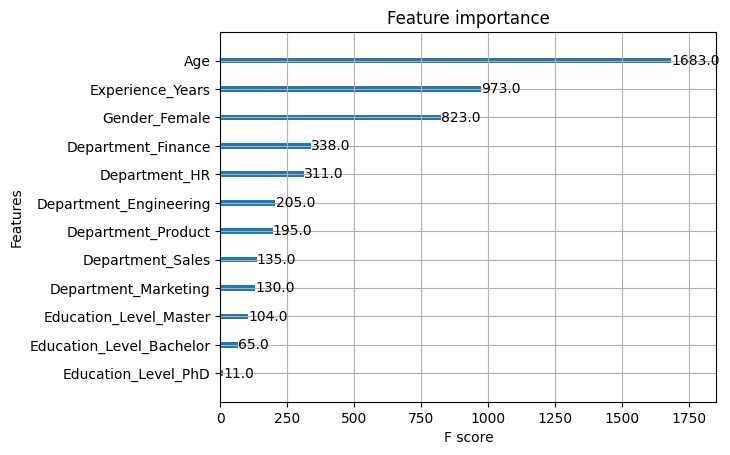

In [73]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train,y_train)
y_pred = model_xgb.predict(x_test)
r2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
print(f"F2 SCORE = {r2}\nMSE = {MSE}")
xgb.plot_importance(model_xgb)